# Plot how this delay time evolves across the day for the five most used stations in Belgium.

In [ ]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)


Check the top 5 stations w.r.t. travelers

In [ ]:
stations = data.stations
travelers = data.travelers
trips = data.full_trips
travelers.sort_values(by = "sum", ascending = False).head(5)

Check the top 5 stations w.r.t. number of trains going to these stations

In [ ]:
pd_df = pd.DataFrame(trips["Name of the stop"].value_counts()).reset_index()
pd_df.columns = ["Name of the stop", "count"]
pd_df.head(5)

We assume that the most used stops are the ones that have the most amount of travelers.

In [ ]:
trips.sort_values(by ="Time of real arrival", ascending=False)
# They all arrive at "31-10" but this is wrong, we only need to look at the time part of this value.
trips["Time of real arrival"].dt.time

In [ ]:
trips = trips.merge(travelers[["Station", "sum"]], left_on=["Name of the stop"], right_on=["Station"], how="left")
trips = trips[(trips["Name of the stop"] == "brussel-noord/bruxelles-nord") | (trips["Name of the stop"] == "brussel-zuid/bruxelles-midi") | (trips["Name of the stop"] == "brussel-centraal/bruxelles-central") | (trips["Name of the stop"] == "gent-sint-pieters") | (trips["Name of the stop"] == "antwerpen-centraal")]

trips = trips.sort_values(by = ["Station", "Time of real departure"])
trips

Some delay times are impossible, also see Q11 , so we delete the delete these.

In [ ]:
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips.sort_values(by = "Delay time", ascending = False)

We see that that most delay occurs at the peak hours: when people go to work / home: around 6-9 am and 16-19pm
The main issue lies within Brussels, y axis up to 250 min...

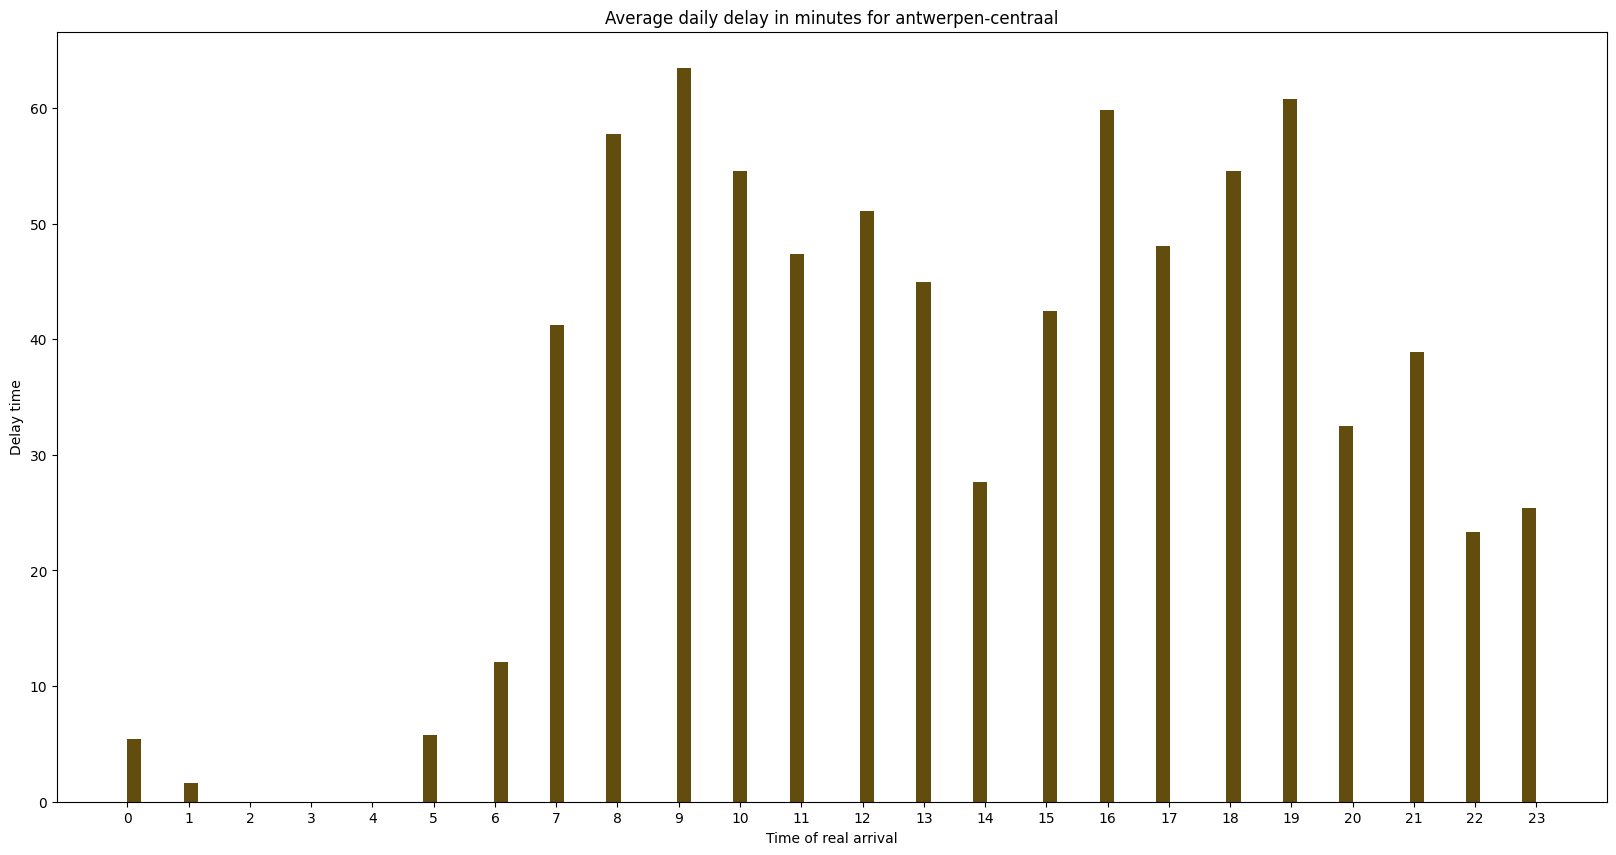

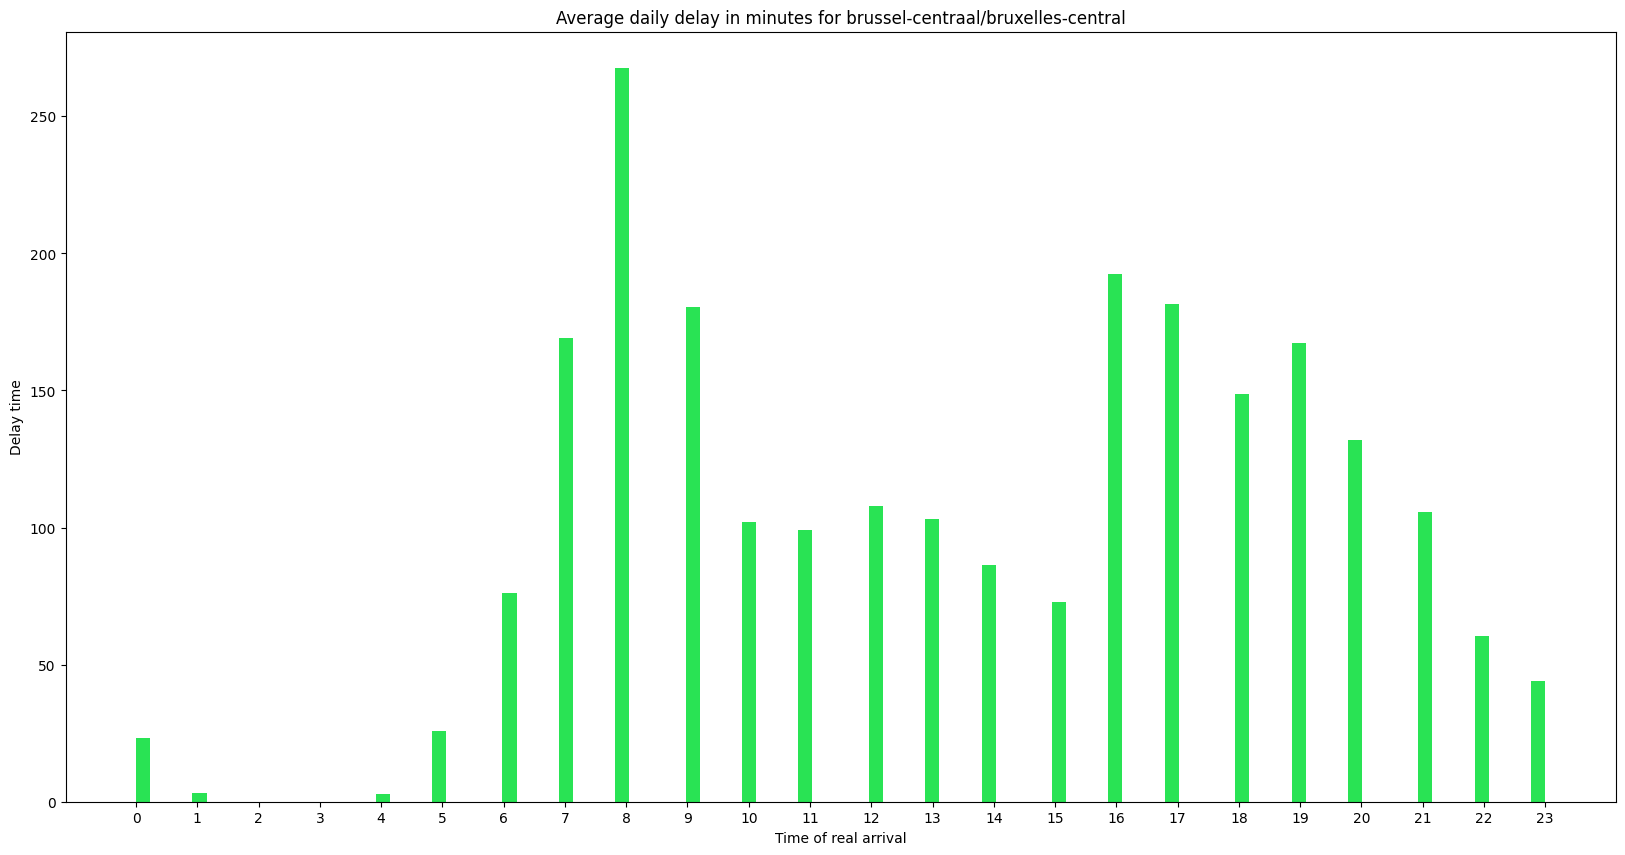

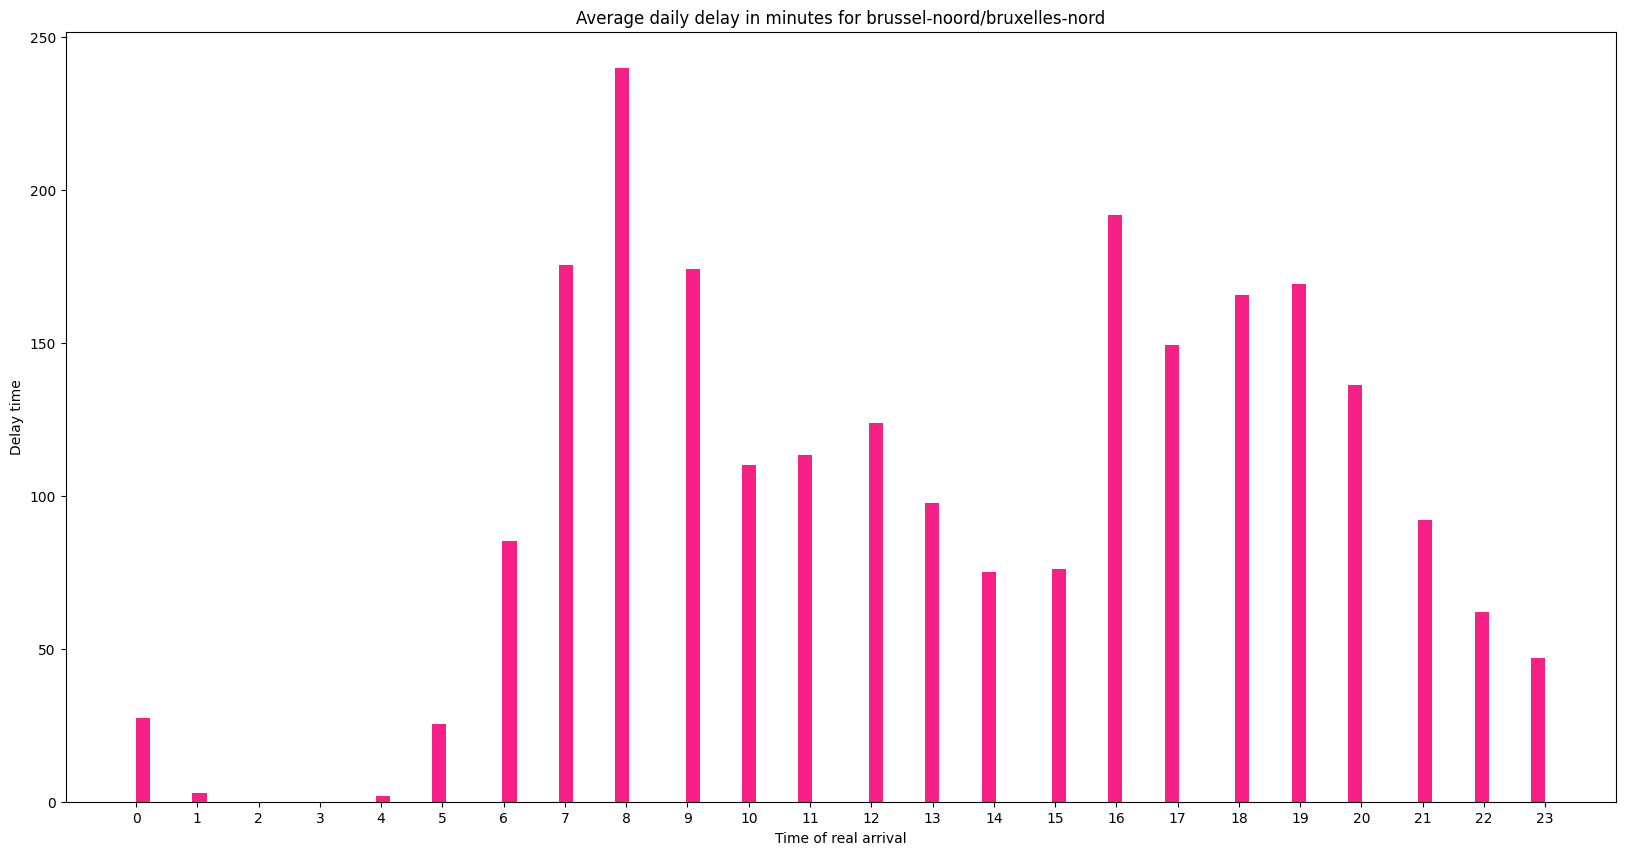

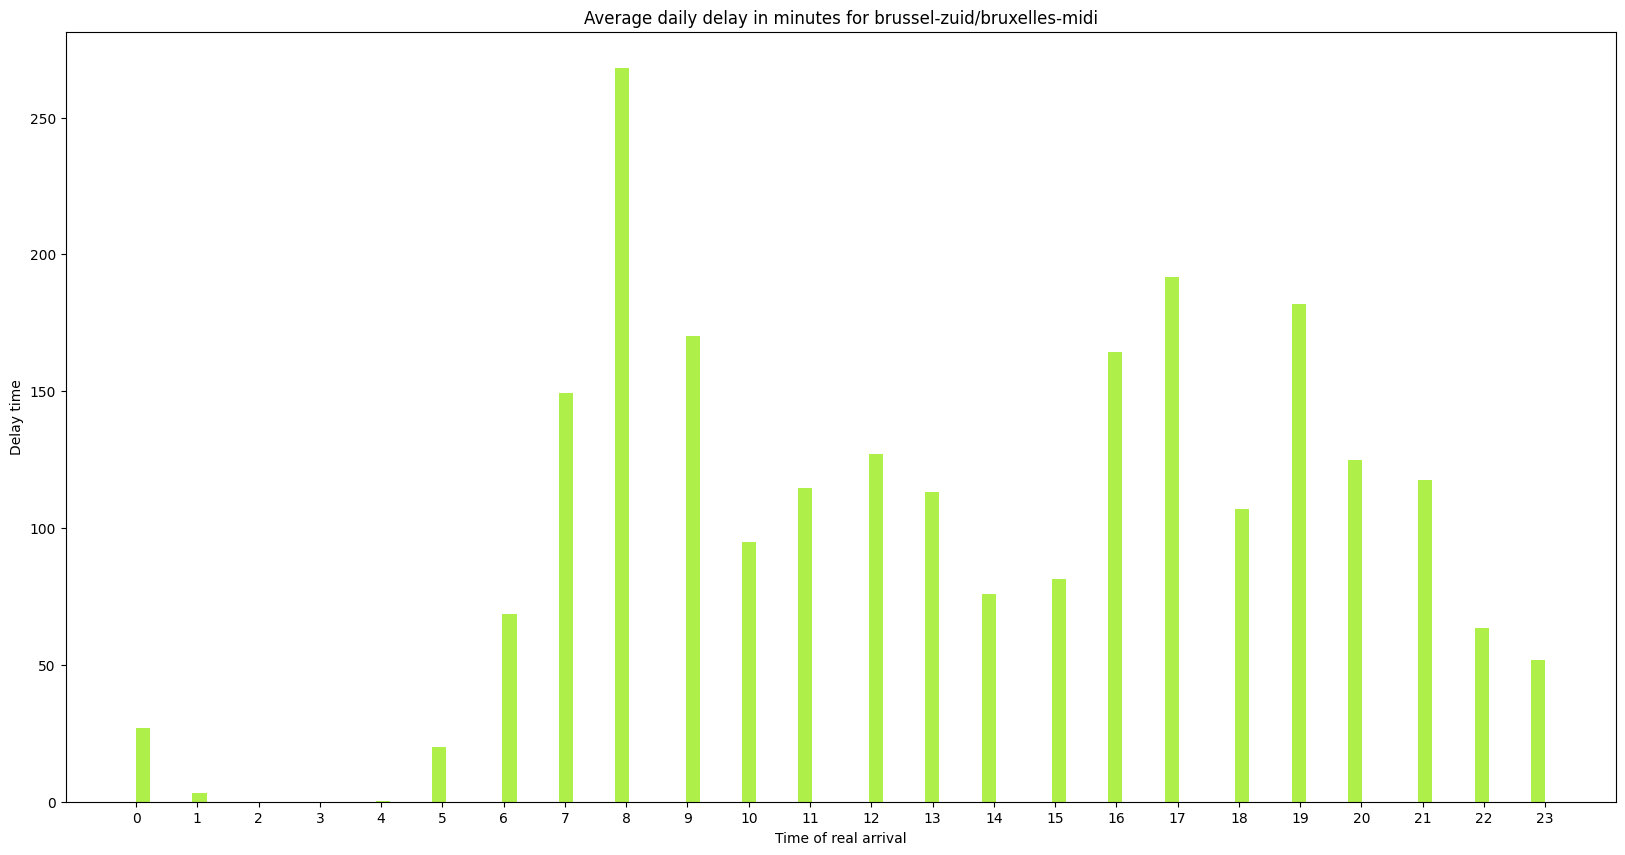

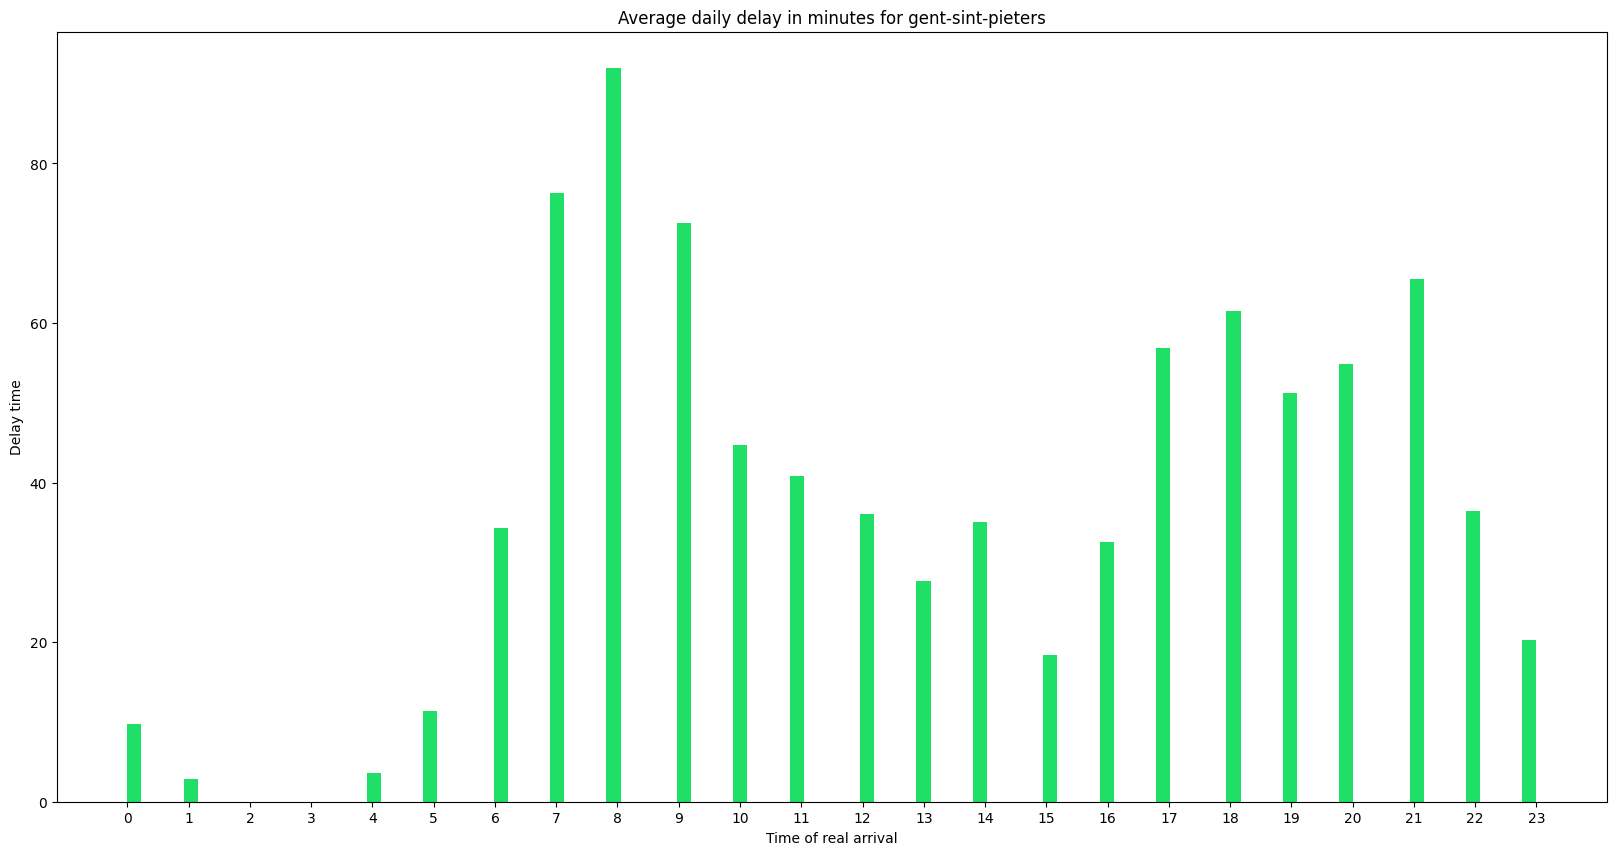

In [83]:
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    plt.figure(figsize=(20,10))
    plt.title("Average daily delay in minutes for "+station)
    plt.xlabel("Time of real arrival")
    plt.ylabel("Delay time")
    plt.xticks(np.arange(0, 24, 1))
    plt.hist(x= trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color=np.random.rand(3,), bins = 100)
    plt.show()

We can also plot them on top of each other

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_68286/769105313.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


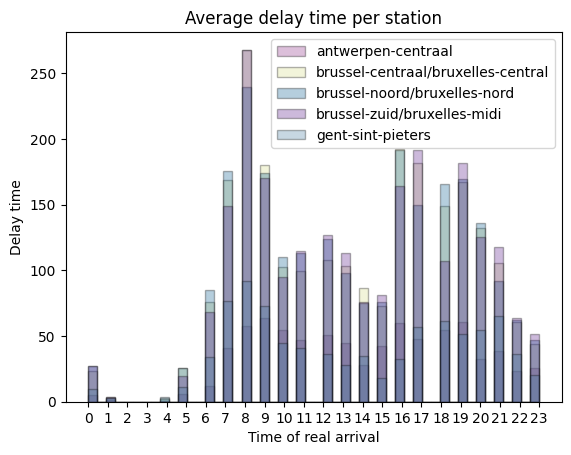

In [84]:
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.30, label = station, edgecolor = "black")
ax.set_xlabel("Time of real arrival")
ax.set_ylabel("Delay time")
ax.set_title("Average delay time per station")
plt.legend(trips["Name of the stop"].unique())
plt.xticks(np.arange(0, 24, 1))


plt.show()

We group brussels together, for the sake of visibility and similarity.

In [85]:
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.30, label = station, edgecolor = "black")
ax.set_xlabel("Time of real arrival")
ax.set_ylabel("Delay time")
ax.set_title("Average delay time per station")
plt.legend(trips["Name of the stop"].unique())
plt.xticks(np.arange(0, 24, 1))


plt.show()

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time,Station,sum
149951,5527,2020-09-20,1995,L B1-2,SNCB/NMBS,27,NaT,2020-09-20 00:05:41,NaT,2020-09-20 00:05:00,L B1-2: BRUSSEL-NOORD -> NIVELLES,antwerpen-centraal,NaN,NaT,2020-09-20,NaT,2020-09-20,0.0,antwerpen-centraal,82099.0
145029,605,2020-09-20,2604,IC 08,SNCB/NMBS,25,NaT,2020-09-20 04:36:49,NaT,2020-09-20 04:36:00,IC 08: ANTWERPEN-CENTRAAL -> HASSELT,antwerpen-centraal,NaN,NaT,2020-09-20,NaT,2020-09-20,0.0,antwerpen-centraal,82099.0
179422,34998,2020-09-20,705,IC 04-1,SNCB/NMBS,59/1,NaT,2020-09-20 05:06:32,NaT,2020-09-20 05:06:00,IC 04-1: ANTWERPEN-CENTRAAL -> POPERINGE,antwerpen-centraal,NaN,NaT,2020-09-20,NaT,2020-09-20,0.0,antwerpen-centraal,82099.0
148010,3586,2020-09-20,1826,IC 02,SNCB/NMBS,25,NaT,2020-09-20 05:06:52,NaT,2020-09-20 05:06:00,IC 02: ANTWERPEN-CENTRAAL -> OOSTENDE,antwerpen-centraal,NaN,NaT,2020-09-20,NaT,2020-09-20,0.0,antwerpen-centraal,82099.0
145587,1163,2020-09-20,2605,IC 08,SNCB/NMBS,25,NaT,2020-09-20 05:36:25,NaT,2020-09-20 05:36:00,IC 08: ANTWERPEN-CENTRAAL -> HASSELT,antwerpen-centraal,NaN,NaT,2020-09-20,NaT,2020-09-20,0.0,antwerpen-centraal,82099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436337,67923,2020-09-24,7084,P,SNCB/NMBS,NaN,2020-09-24 07:27:17,NaT,2020-09-24 07:24:00,NaT,NaN,gent-sint-pieters,50E,2020-09-24,NaT,2020-09-24,NaT,197.0,gent-sint-pieters,101227.0
437294,68880,2020-09-24,680,L G3,SNCB/NMBS,NaN,2020-09-24 10:15:09,NaT,2020-09-24 10:14:00,NaT,L G3: LOKEREN -> GENT-SINT-PIETERS,gent-sint-pieters,50E,2020-09-24,NaT,2020-09-24,NaT,69.0,gent-sint-pieters,101227.0
437657,69243,2020-09-24,679,L G3,SNCB/NMBS,NaN,2020-09-24 09:26:24,NaT,2020-09-24 09:14:00,NaT,L G3: LOKEREN -> GENT-SINT-PIETERS,gent-sint-pieters,50E,2020-09-24,NaT,2020-09-24,NaT,744.0,gent-sint-pieters,101227.0
437796,69382,2020-09-24,7963,P,SNCB/NMBS,NaN,2020-09-24 08:36:18,NaT,2020-09-24 08:35:00,NaT,NaN,gent-sint-pieters,75,2020-09-24,NaT,2020-09-24,NaT,78.0,gent-sint-pieters,101227.0


/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_68286/2770564902.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


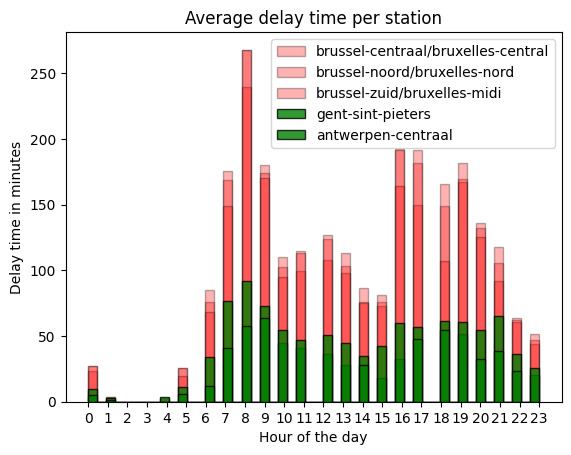

In [98]:

fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
for station in  ["brussel-centraal/bruxelles-central", "brussel-noord/bruxelles-nord", "brussel-zuid/bruxelles-midi"]:
    color = "red"
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.30, label = station, edgecolor = "black")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Delay time in minutes")
ax.set_title("Average delay time per station")
plt.legend()
plt.xticks(np.arange(0, 24, 1))

for station in ["gent-sint-pieters", "antwerpen-centraal"]:
    color = "green"
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.8, label = station, edgecolor = "black")

plt.legend()

plt.show()

We see that the biggest amonunt of delay time is in Brussels

In [91]:
trips["Name of the stop"].unique()

array(['antwerpen-centraal', 'brussel-centraal/bruxelles-central',
       'brussel-noord/bruxelles-nord', 'brussel-zuid/bruxelles-midi',
       'gent-sint-pieters'], dtype=object)